Sample data:
  incident_day  cartheft  motorcycletheft  othervehicletheft
0   2014-01-01         2                8                  0
1   2014-01-02         2               14                  3
2   2014-01-03         6               27                  1
3   2014-01-04         5               18                  0
4   2014-01-05         6               16                  3
data type: 
incident_day         datetime64[ns]
cartheft                      int64
motorcycletheft               int64
othervehicletheft             int64
dtype: object
Data Summary 
          cartheft  motorcycletheft  othervehicletheft
count  1004.000000      1004.000000        1004.000000
mean      2.915339        16.529880           1.289841
std       1.861025         5.055041           1.207593
min       0.000000         2.000000           0.000000
25%       2.000000        13.000000           0.000000
50%       3.000000        16.000000           1.000000
75%       4.000000        20.000000           2.0000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000990A048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009A02048>]], dtype=object)

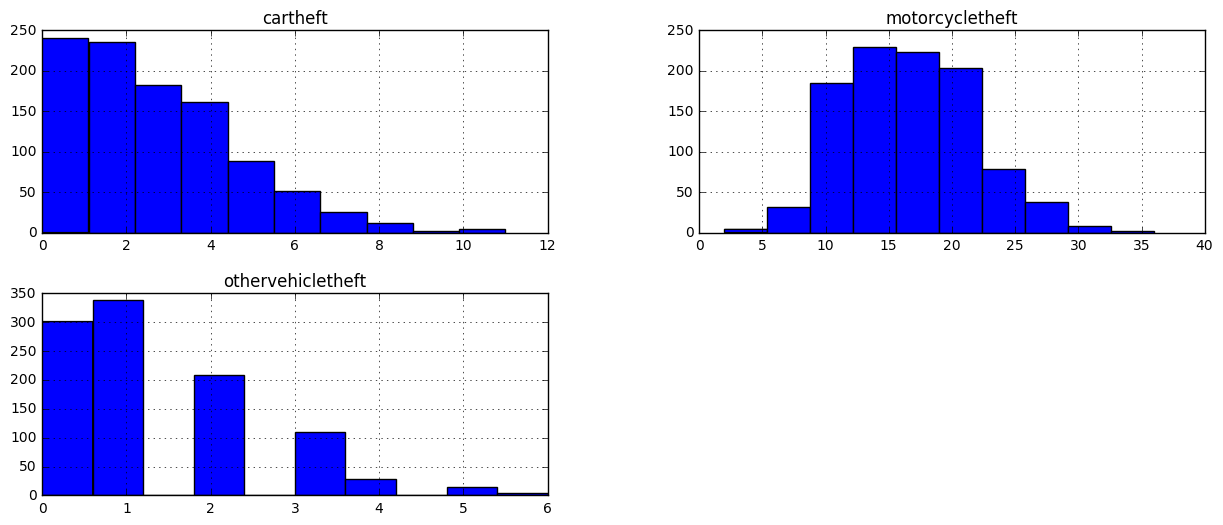

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


data = pd.read_csv('dailycrimes_weather_v1.csv')
data['incident_day']=pd.to_datetime(data['incident_day']) #3 Converting into datetime type
crimes=['cartheft', 'motorcycletheft', 'othervehicletheft']
col=['incident_day']
col.extend(crimes)
data=data[col]
print 'Sample data:\n',data.head()
print 'data type: \n', data.dtypes
print 'Data Summary \n', data.describe()
print 'Crimes Histograms'
data.hist(column=crimes)

In [2]:
indexed_df = data.set_index(['incident_day'])
indexed_df

,cartheft,motorcycletheft,othervehicletheft
incident_day,,,
2014-01-01,2,8,0
2014-01-02,2,14,3
2014-01-03,6,27,1
2014-01-04,5,18,0
2014-01-05,6,16,3
2014-01-06,1,16,4
2014-01-07,2,15,3
2014-01-08,4,15,1
2014-01-09,1,19,1


In [3]:
ts = indexed_df['cartheft'] 
ts.head(10)

incident_day
2014-01-01    2
2014-01-02    2
2014-01-03    6
2014-01-04    5
2014-01-05    6
2014-01-06    1
2014-01-07    2
2014-01-08    4
2014-01-09    1
2014-01-10    4
Name: cartheft, dtype: int64

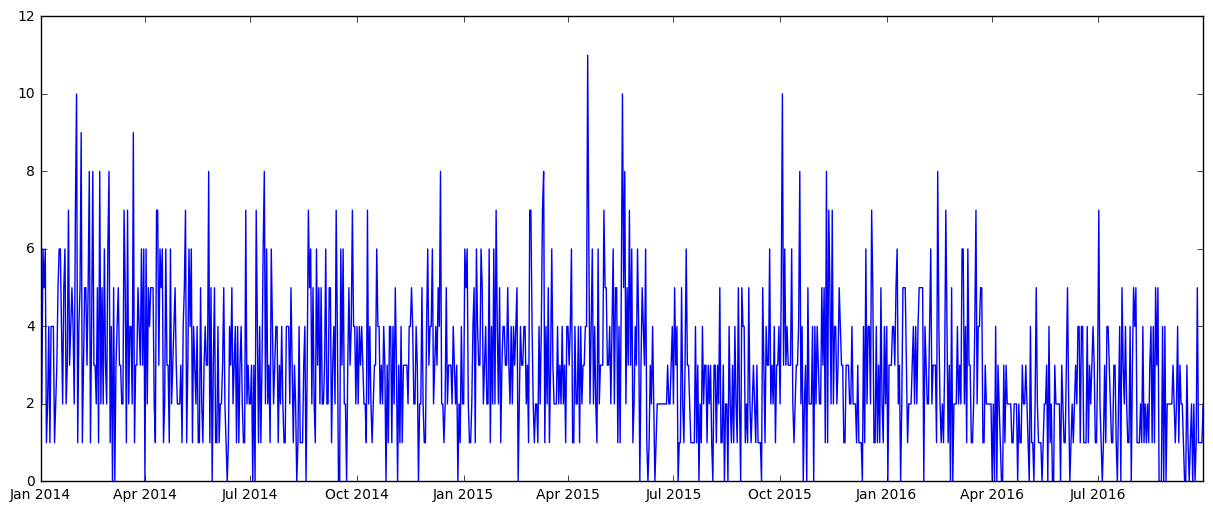

In [4]:
plt.plot(ts)

## Determining rolling statistics to know if series is stationary

A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
Most of the Time series models work on the assumption that the time series is stationary. We can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same patern in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.
We can check stationary either by 
1- Ploting rolling statistics
2- Or by Dickey Fuller Test - Statistical test

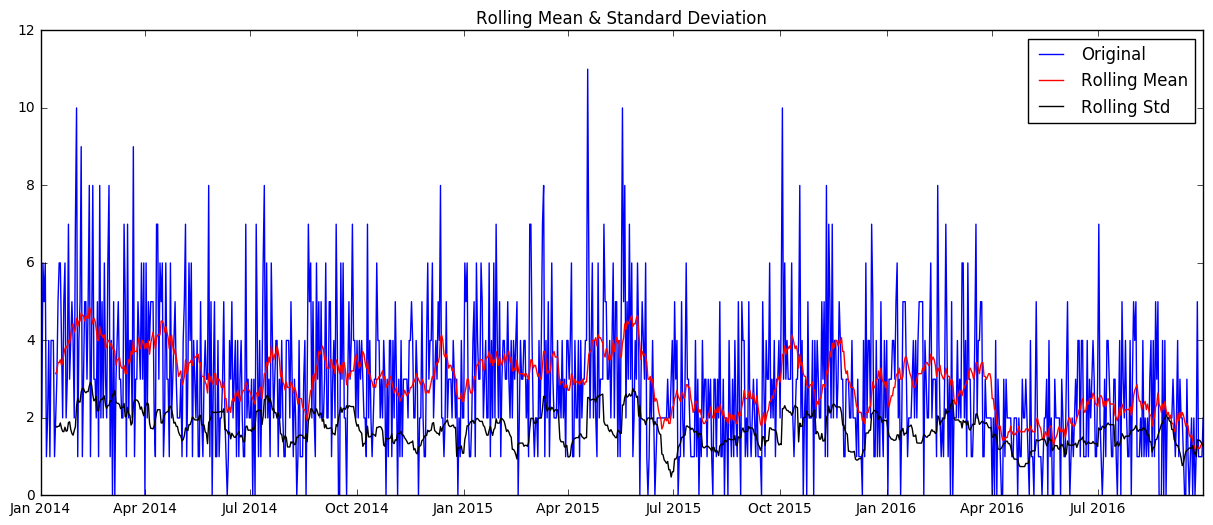

In [5]:
rolmean = ts.rolling(window=14).mean() # 7 days- weekly rolling mean
rolstd= ts.rolling(window=14).std() #rolling SD
#Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


Visually we can see for multiple values (7 , 30, 60, 90) std and mean are not same.
The series is not seems to be stationary, But to be sure lets do statistical tests.
Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details. https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

In [6]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                  -4.035860
p-value                          0.001234
#Lags Used                      14.000000
Number of Observations Used    989.000000
Critical Value (5%)             -2.864467
Critical Value (1%)             -3.436979
Critical Value (10%)            -2.568328
dtype: float64


Lets create funtion to test all crimes series one by one, to see if there is any stationary series

In [7]:
for crime in crimes:
    print '#####', crime, '####'
    ts=indexed_df[crime]
    #print ts.head(7)
    #plt.plot(ts)
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    if dftest[0]> dftest[4]['5%']: 
        print '--- Time Series is  non-stationary \n'
    else:
        print '\n +++ Time Series is stationary \n'


##### cartheft ####
Results of Dickey-Fuller Test:
Test Statistic                  -4.035860
p-value                          0.001234
#Lags Used                      14.000000
Number of Observations Used    989.000000
Critical Value (5%)             -2.864467
Critical Value (1%)             -3.436979
Critical Value (10%)            -2.568328
dtype: float64

 +++ Time Series is stationary 

##### motorcycletheft ####
Results of Dickey-Fuller Test:
Test Statistic                  -4.736273
p-value                          0.000072
#Lags Used                      13.000000
Number of Observations Used    990.000000
Critical Value (5%)             -2.864464
Critical Value (1%)             -3.436973
Critical Value (10%)            -2.568327
dtype: float64

 +++ Time Series is stationary 

##### othervehicletheft ####
Results of Dickey-Fuller Test:
Test Statistic                -9.251342e+00
p-value                        1.489387e-15
#Lags Used                     6.000000e+00
Number of Obs

# Forcasting Time Series

- If series is strictly stationary with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
- If a series with significant dependence among values, we need to use some statistical models like ARIMA to forecast the data.

## Auto-Regressive Integrated Moving Averages (ARIMA)
The ARIMA forecasting for a stationary time series is very similar to linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model, we need to answer following questions:

Q1. Is it an AR or MA process?

Q2. What order of AR or MA process do we need to use?

- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

We will use following two graphs to determine the value of ‘p’ and ‘q’.

### Autocorrelation Function (ACF): 
It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
### Partial Autocorrelation Function (PACF): 
This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.


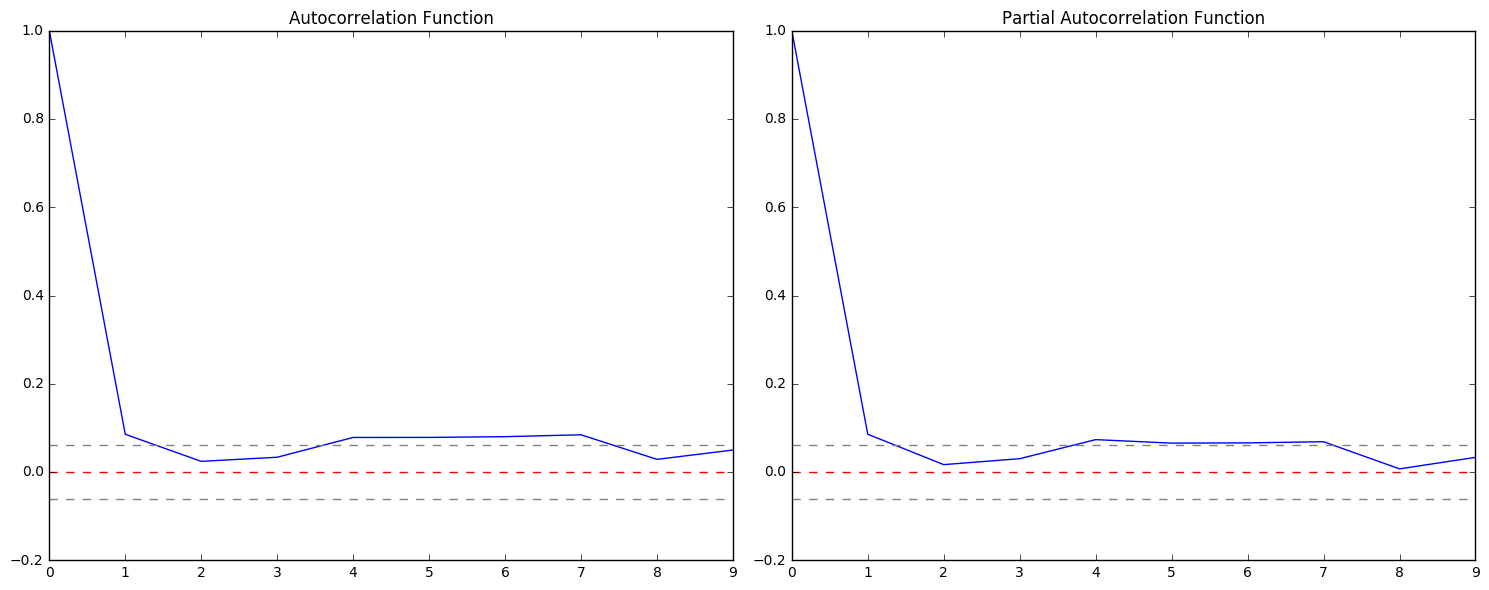

In [8]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=9) # ts is cartheftt series 
lag_pacf = pacf(ts, nlags=9, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two grey dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the 'p' and 'q' values as:

- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. Lets print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.
Lets fisrt do AR Model
### AR Model


incident_day
2014-01-01    0.0
2014-01-02    3.0
2014-01-03    1.0
2014-01-04    0.0
2014-01-05    3.0
Name: othervehicletheft, dtype: float32


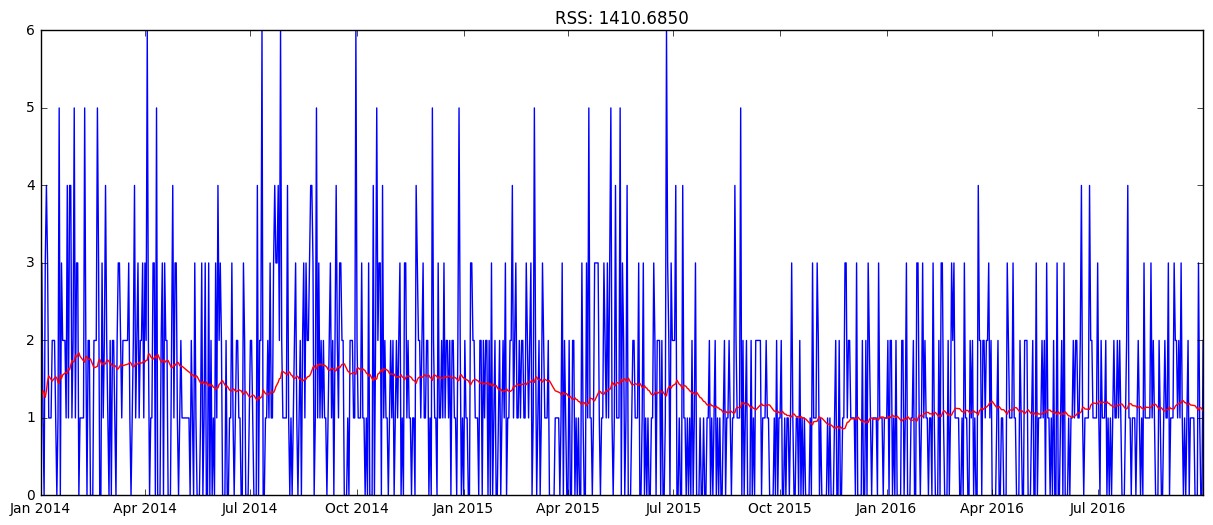

In [20]:
from statsmodels.tsa.arima_model import ARIMA
ts=pd.to_numeric(ts, downcast='float')
print ts.head(5)
#First Case
model = ARIMA(ts,(1,0,1))  #order argument of ARIMA which take a tuple (p,d,q)
results_AR = model.fit()  
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts)**2))